In [1]:
#!/usr/bin/env python

'''
DESCRIPTION
-----------
    Encoding information

RETURN
------
    {EXPERIMENT}_enc.png : png file
        graph


EXPORTED FILE(s) LOCATION
-------------------------
    ./models/NN/{EXPERIMENT}/{EXPERIMENT}_enc.png
'''

# importing default libraries
import os, argparse, sys
# sys.path.append('./')
ROOT_DIR = os.path.dirname(os.path.dirname(os.path.abspath('__file__')))
os.chdir(ROOT_DIR)
sys.path.append(ROOT_DIR)
# importing scripts in scripts folder
from scripts import config as src

**** scripts/config.py IMPORTED!!!
**** PROJECT FOLDER ,  /home/pgundogdu/projects/signalization_prior_knowledge_based_nn


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.manifold import TSNE

TINY_SIZE = 8
SMALL_SIZE = 10
NORMAL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=MEDIUM_SIZE)         # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=12)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=TINY_SIZE)     # fontsize of the tick labels
plt.rc('ytick', labelsize=TINY_SIZE)     # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('legend', title_fontsize=NORMAL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## MELANOMA

In [3]:
src.define_folder('./reports/encoding/exper_melanoma')

FOLDER information,  ./reports/encoding/exper_melanoma/


'./reports/encoding/exper_melanoma/'

In [4]:
df_query = pd.read_pickle('./data/processed/exper_melanoma/query_log1p.pck')
df_query

,a2m,abcb11,abcb4,abcc2,abcc8,abhd5,abi2,abl1,abl2,ablim1,...,zbp1,zbtb17,zfp36l1,zfp36l2,zfyve16,zfyve9,zmat3,znf274,zyx,cell_type
0,0.000000,0.0,0.0,0.000000,0.0,3.189653,3.305054,0.000000,2.261763,0.000000,...,1.226712,0.000000,5.301064,2.113843,3.305420,3.702536,1.202972,0.000000,3.349202,Neg.cell
1,7.886006,0.0,0.0,0.000000,0.0,4.069710,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,6.393992,0.000000,0.000000,0.000000,3.551914,0.000000,0.000000,Neg.cell
2,6.300162,0.0,0.0,0.000000,0.0,0.000000,3.378611,0.000000,3.527536,0.000000,...,0.000000,0.000000,2.507157,0.000000,2.512846,0.000000,2.758109,0.000000,0.000000,Neg.cell
3,6.989400,0.0,0.0,0.000000,0.0,0.000000,3.117950,3.971800,1.640937,0.000000,...,0.000000,0.000000,3.159975,3.823192,2.022871,0.000000,0.000000,0.000000,0.000000,Neg.cell
4,0.000000,0.0,0.0,4.033887,0.0,0.576613,3.353756,0.000000,1.196948,0.000000,...,0.000000,0.000000,5.894293,3.120160,0.000000,0.000000,0.783902,3.655581,0.000000,Neg.cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3407,0.000000,0.0,0.0,0.000000,0.0,0.000000,2.634762,0.000000,2.017566,3.684118,...,0.000000,5.912908,4.888317,6.408446,0.631272,0.000000,3.038792,0.000000,0.000000,T.CD8
3408,0.000000,0.0,0.0,0.000000,0.0,0.000000,1.316408,0.000000,1.897620,0.000000,...,0.000000,0.000000,3.929863,5.199325,0.000000,0.000000,0.000000,0.000000,0.000000,T.CD8
3409,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,2.766319,0.000000,4.506785,...,0.000000,4.933322,4.286479,5.002267,0.000000,0.000000,0.000000,0.000000,5.598422,T.CD8
3410,0.000000,0.0,0.0,0.000000,0.0,0.000000,2.759377,0.000000,1.335001,0.000000,...,2.755570,0.000000,6.399194,5.954256,0.000000,0.000000,2.319442,0.000000,4.051785,T.CD8


In [5]:
X = df_query.iloc[:, :-1].values
y_ground_truth = df_query.iloc[:, -1:]

print('shape of feature and traget dataset, feature dataset, {0}, target column {1}'.format(X.shape, y_ground_truth.shape))

shape of feature and traget dataset, feature dataset, (3412, 2877), target column (3412, 1)


Loaded model!! ./models/NN/exper_melanoma/model_a1_reference_log1p_train_test_split_trained.h5
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1_input (InputLayer)    [(None, 2877)]            0         
_________________________________________________________________
layer1 (Dense)               (None, 93)                267654    
Total params: 267,654
Trainable params: 267,654
Non-trainable params: 0
_________________________________________________________________
a1
Loaded model!! ./models/NN/exper_melanoma/model_a2_reference_log1p_train_test_split_trained.h5
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1_input (InputLayer)    [(None, 2877)]            0         
_________________________________________________________________
layer1 (Dense)               (None, 93)  

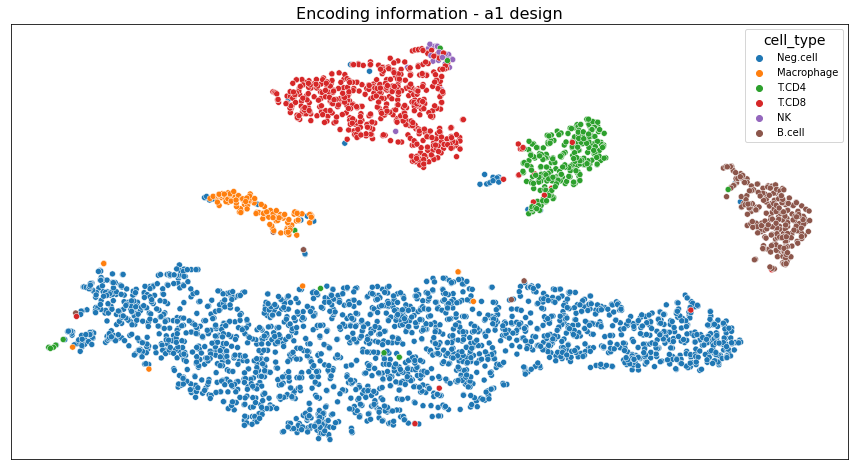

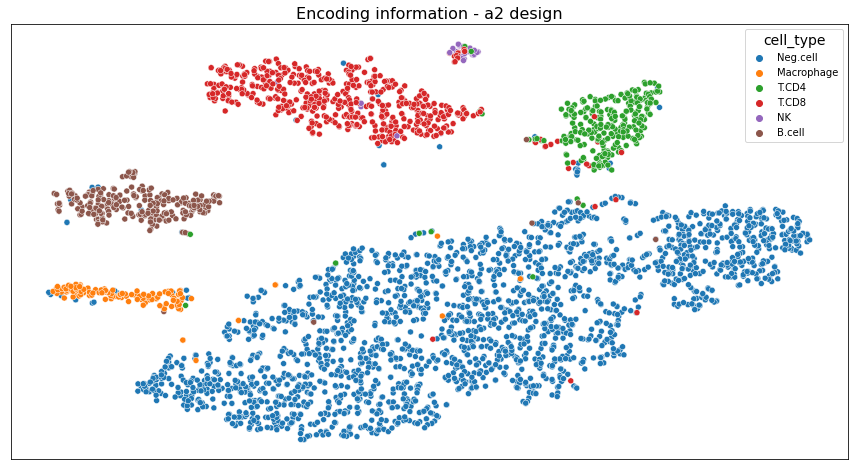

In [6]:
np.random.seed(91)
for i_design in ['a1','a2']:
#     design = 'a1'
    _, model_encoding = src.loading_model('./models/NN/exper_melanoma/model_'+i_design+'_reference_log1p_train_test_split_trained.h5', -1)
    model_encoding.summary()
    print(i_design)

    encoding = model_encoding.predict(X)
    tsne = TSNE().fit_transform(encoding)

    df_encoding_tsne = pd.concat([pd.DataFrame(tsne, columns=['tsne1', 'tsne2']), y_ground_truth], axis=1)

    plt.figure(figsize=(15,8))
    
    sns.scatterplot(data=df_encoding_tsne, x='tsne1', y='tsne2', hue='cell_type')
    plt.title('Encoding information - '+i_design+' design')
    
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.savefig('./reports/encoding/exper_melanoma/mel_enc_query_'+i_design+'.png', dpi=300, bbox_inches = 'tight')
    plt.savefig('./reports/encoding/exper_melanoma/mel_enc_query_'+i_design+'.pdf', dpi=300, bbox_inches = 'tight')
    plt.savefig('./reports/encoding/exper_melanoma/mel_enc_query_'+i_design+'.svg', dpi=300, bbox_inches = 'tight')
    

In [7]:
del(df_query)
del(df_encoding_tsne)
del(X, y_ground_truth)

## IMMUNE

In [8]:
src.define_folder('./reports/encoding/exper_immune')

FOLDER information,  ./reports/encoding/exper_immune/


'./reports/encoding/exper_immune/'

In [9]:
df_immune = pd.read_pickle('./data/processed/exper_immune/Fig3g_log1p.pck')
print(df_immune.shape)
sort_genes = sorted(df_immune.columns[:-1])
sort_genes.extend(df_immune.columns[-1:])
df_immune = df_immune[sort_genes]
df_immune

X = df_immune.iloc[:, :-1].values
y = df_immune.iloc[:, -1:]
ohe = OneHotEncoder()
y_ohe = ohe.fit_transform(y.values).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=91, stratify=y_ohe)
target_y = pd.concat([y_train, y_test])

(9703, 2801)


Loaded model!! ./models/NN/exper_immune/model_a1_Fig3g_log1p_train_test_split_trained.h5
Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1_input (InputLayer)    [(None, 2800)]            0         
_________________________________________________________________
layer1 (Dense)               (None, 93)                260493    
Total params: 260,493
Trainable params: 260,493
Non-trainable params: 0
_________________________________________________________________
a1
Loaded model!! ./models/NN/exper_immune/model_a2_Fig3g_log1p_train_test_split_trained.h5
Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1_input (InputLayer)    [(None, 2800)]            0         
_________________________________________________________________
layer1 (Dense)               (None, 93)              

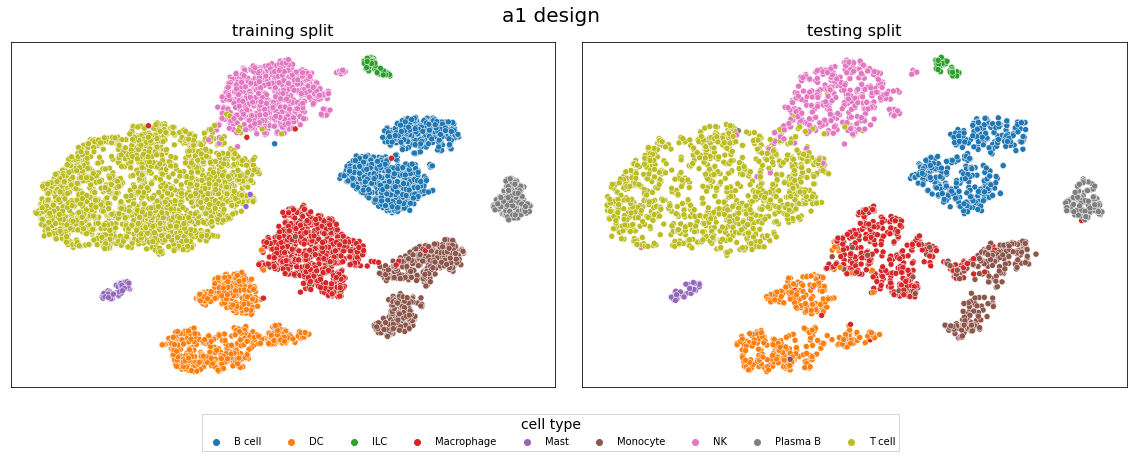

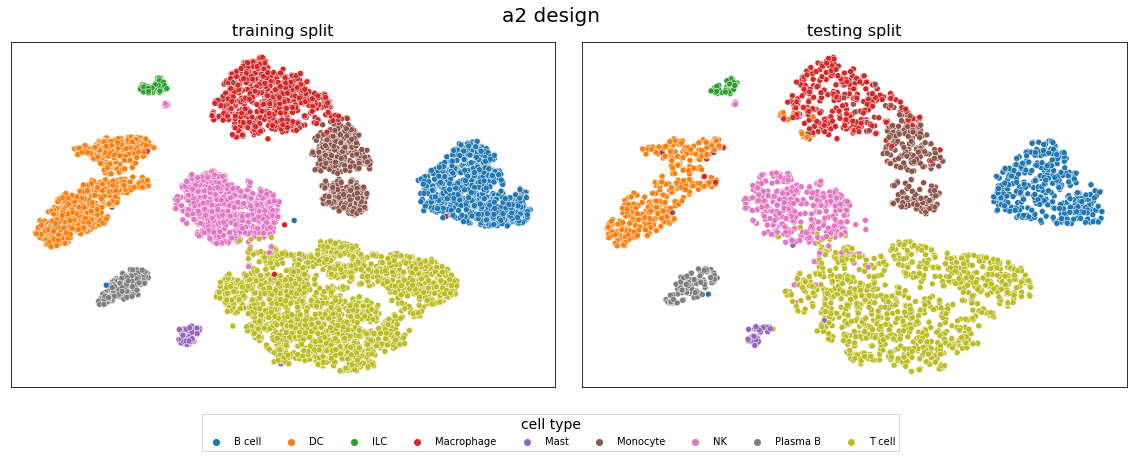

In [10]:
np.random.seed(91)
for i_design in ['a1','a2']:
    
    _, model_encoding = src.loading_model('./models/NN/exper_immune/model_'+i_design+'_Fig3g_log1p_train_test_split_trained.h5', -1)
    model_encoding.summary()
    print(i_design)
    
    encoding_train = pd.DataFrame(model_encoding.predict(X_train))
    encoding_train['training_testing']='training'
    encoding_test = pd.DataFrame(model_encoding.predict(X_test))
    encoding_test['training_testing']='testing'
    
    target_y = pd.concat([y_train, y_test])
    
    encoding_comb = pd.concat([encoding_train, encoding_test], axis=0).reset_index(drop=True)
    
    tsne_encoding = TSNE().fit_transform(encoding_comb.iloc[:, :-1])
    
    df_encoding_tsne = pd.concat([pd.DataFrame(tsne_encoding, columns=['tsne1', 'tsne2'])
                              , encoding_comb['training_testing'].reset_index(drop=True)
                              , target_y.reset_index(drop=True)], axis=1)

    
    fig, axes= plt.subplots(ncols=2, figsize=(20,6))
    sns.scatterplot(data=df_encoding_tsne[df_encoding_tsne['training_testing']=='training']
                    , x='tsne1', y='tsne2'
                    , hue='cell_type', ax=axes[0]
                    , hue_order=sorted(set(df_encoding_tsne['cell_type'])))
    axes[0].get_legend().remove()
    axes[0].set_title('training split')

    sns.scatterplot(data=df_encoding_tsne[df_encoding_tsne['training_testing']=='testing']
                    , x='tsne1', y='tsne2'
                    , hue='cell_type', ax=axes[1]
                    , hue_order=sorted(set(df_encoding_tsne['cell_type'])))
    axes[1].get_legend().remove()
    axes[1].set_title('testing split')


    handles, labels = axes[0].get_legend_handles_labels()
    lgd = fig.legend(handles, labels, loc='upper center', title='cell type', bbox_to_anchor=(.5, 0.05), fancybox=False, shadow=False, ncol=9)
    axes[0].axes.get_yaxis().set_visible(False)
    axes[0].axes.get_xaxis().set_visible(False)

    axes[1].axes.get_yaxis().set_visible(False)
    axes[1].axes.get_xaxis().set_visible(False)
    fig.suptitle(i_design+' design')
    plt.subplots_adjust(left=0.125,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.05, 
                        hspace=0.4)
    
    # fig.savefig('encoding.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.savefig('./reports/encoding/exper_immune/immune_enc_'+i_design+'.png', dpi=300, bbox_inches = 'tight')
    plt.savefig('./reports/encoding/exper_immune/immune_enc_'+i_design+'.pdf', dpi=300, bbox_inches = 'tight')
    plt.savefig('./reports/encoding/exper_immune/immune_enc_'+i_design+'.svg', dpi=300, bbox_inches = 'tight')

In [14]:
del(df_immune)
del(df_encoding_tsne)
del(X,y ,y_ohe)
del(X_train, y_train)
del(X_test, y_test)

## MOUSE

In [3]:
loc_mouse = src.define_folder('./reports/encoding/exper_mouse')
loc_mouse

FOLDER information,  ./reports/encoding/exper_mouse/


'./reports/encoding/exper_mouse/'

In [4]:
df_cell_detail = pd.read_pickle('./data/processed/exper_mouse/mouse_retrieval_sw_StandardScaler.pck')
df_cell_detail['cell_type_detail'] = df_cell_detail['cell_type']
df_cell_detail['cell_type'] = df_cell_detail['cell_type'].str.split('_', expand=True)[0]

df_cell_detail.loc[df_cell_detail.index.isin(np.where(df_cell_detail['cell_type'].isin(['E12', 'E14', 'adult']))[0]), 'cell_type'] = 'HSC'
df_cell_detail.loc[df_cell_detail.index.isin(np.where(df_cell_detail['cell_type'].isin(['celebral-cortex', 'CNS', 'brain']))[0]), 'cell_type'] = 'neuron'
df_cell_detail = df_cell_detail.loc[df_cell_detail['cell_type'].isin(['HSC','4cell','ICM','spleen','8cell','neuron','zygote','2cell','ESC'])].reset_index(drop=True)
print(df_cell_detail.shape)

(13645, 1647)


In [5]:
df = pd.read_pickle('./data/processed/exper_mouse/mouse_retrieval_cv_sw_StandardScaler.pck')
# print(df.shape)
sort_genes = sorted(df.columns[:-1])
sort_genes.extend(df.columns[-1:])
df = df[sort_genes]
# print(df.head())

X = df.iloc[:, :-1].values
y_ground_truth = df.iloc[:, -1:]

print('shape of feature and traget dataset, feature dataset, {0}, target column {1}'.format(X.shape, y_ground_truth.shape))

shape of feature and traget dataset, feature dataset, (13645, 1645), target column (13645, 1)


Loaded model!! ./models/NN/exper_mouse/model_a1_mouse_training_sw_StandardScaler_train_test_split_trained.h5
Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1_input (InputLayer)    [(None, 1645)]            0         
_________________________________________________________________
layer1 (Dense)               (None, 92)                151432    
Total params: 151,432
Trainable params: 151,432
Non-trainable params: 0
_________________________________________________________________
a1
Loaded model!! ./models/NN/exper_mouse/model_a2_mouse_training_sw_StandardScaler_train_test_split_trained.h5
Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1_input (InputLayer)    [(None, 1645)]            0         
_________________________________________________________________
layer1 (Den

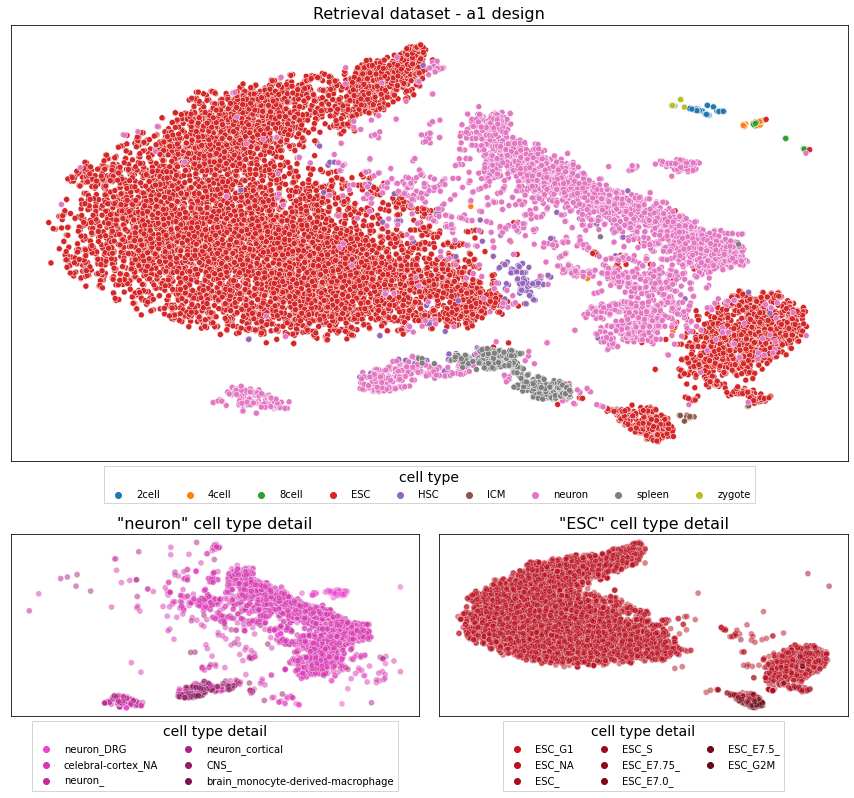

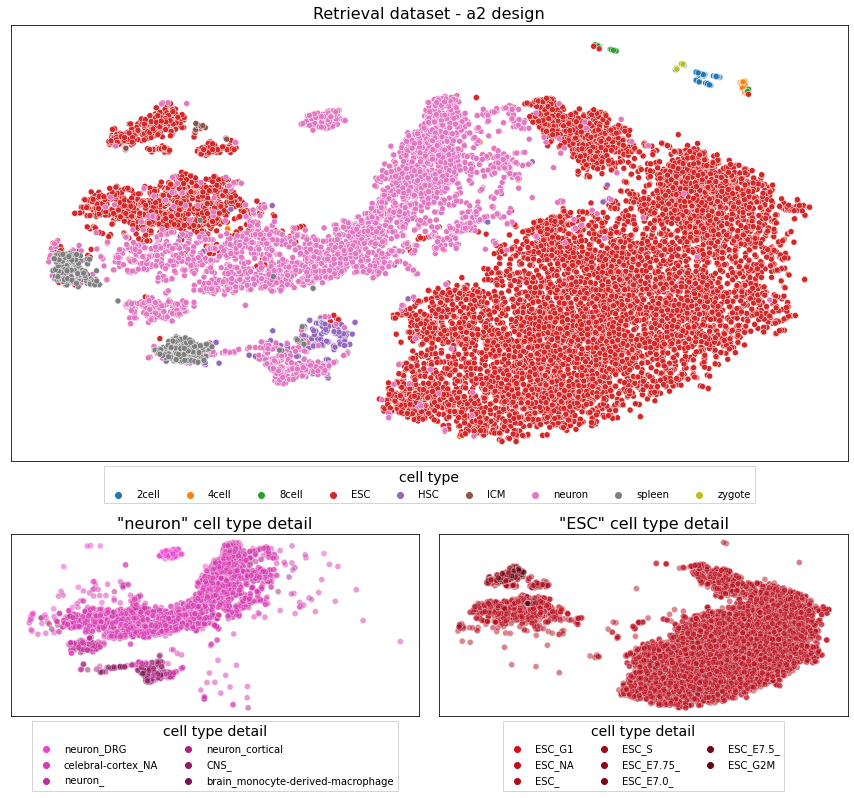

In [20]:
# design='a1'
np.random.seed(91)
pink_color=['#ee44ce','#d838b2','#c22d97','#ab237e','#931a67','#7c1252']
red_color=['#ca111f','#bb0e1e','#ac0b1d','#9d091c','#8f081a','#800718','#720616','#640614']
for i_design in ['a1','a2']:
    _, model_encoding = src.loading_model('./models/NN/exper_mouse/model_'+i_design+'_mouse_training_sw_StandardScaler_train_test_split_trained.h5', -1)
    model_encoding.summary()
    print(i_design)
    
    encoding = model_encoding.predict(X)
    tsne = TSNE().fit_transform(encoding)

    df_encoding_tsne = pd.concat([pd.DataFrame(tsne, columns=['tsne1', 'tsne2']), y_ground_truth], axis=1)
    sorter_index=dict(zip(sorted(set(df['cell_type'])), range(len(set(df['cell_type']))) ))
    df_encoding_tsne['order'] = df_encoding_tsne['cell_type'].map(sorter_index)
    df_encoding_tsne['cell_type_detail'] = df_cell_detail['cell_type_detail']
    df_encoding_tsne
    
    
    fig = plt.figure(figsize=(15,12))
    ax1 = plt.subplot2grid((3, 2), (0, 0), colspan=2, rowspan=2)
    # ax2 = plt.subplot2grid((4, 2), (2, 0), colspan=1)
    ax3 = plt.subplot2grid((3, 2), (2, 0), colspan=1)
    # ax4 = plt.subplot2grid((4, 2), (2, 1), colspan=1)
    ax5 = plt.subplot2grid((3, 2), (2, 1), colspan=1)

    sns.scatterplot(data=df_encoding_tsne.sort_values(by='order')
                    , x='tsne1', y='tsne2', hue='cell_type', ax=ax1, alpha=1., marker="o")
    ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 0.0), title='cell type', fancybox=False, shadow=False, ncol=len(y_ground_truth['cell_type'].unique()));

    # sns.scatterplot(data=df_encoding_tsne.loc[df_encoding_tsne['cell_type'].isin(['neuron'])].sort_values(by='order')
    #                 , x='tsne1', y='tsne2', hue='cell_type', ax=ax2, alpha=.5, marker="o", palette=['#DA8BC3'])

    sns.scatterplot(data=df_encoding_tsne.loc[df_encoding_tsne['cell_type'].isin(['neuron'])].sort_values(by='order')
                    , x='tsne1', y='tsne2', hue='cell_type_detail', ax=ax3, alpha=.5, marker="o", palette=pink_color)
    ax3.legend(loc='upper center', bbox_to_anchor=(.5, 0.0), title='cell type detail', fancybox=False, shadow=False, ncol=2, fontsize=SMALL_SIZE)

    # sns.scatterplot(data=df_encoding_tsne.loc[df_encoding_tsne['cell_type'].isin(['ESC'])].sort_values(by='order')
    #                 , x='tsne1', y='tsne2', hue='cell_type', ax=ax4, alpha=.5, marker="o", palette=['#C44E52'])

    sns.scatterplot(data=df_encoding_tsne.loc[df_encoding_tsne['cell_type'].isin(['ESC'])].sort_values(by='order')
                    , x='tsne1', y='tsne2', hue='cell_type_detail', ax=ax5, alpha=.5, marker="o", palette=red_color)
    ax5.legend(loc='upper center', bbox_to_anchor=(.5, 0.0), title='cell type detail', fancybox=False, shadow=False, ncol=3, fontsize=SMALL_SIZE)

    for axes in [ax1,ax3,ax5]:
    #         axes.axes.xaxis.set_ticks([])
    #         axes.axes.yaxis.set_ticks([])
        axes.axes.xaxis.set_visible(False)
        axes.axes.yaxis.set_visible(False)
    #     axes.yaxis.label.set_visible(False)

#     ax1.set(xlabel='(a)', ylabel='')
#     ax2.set(xlabel='(b)', ylabel='')
#     ax3.set(xlabel='(b)', ylabel='')
#     ax4.set(xlabel='(d)', ylabel='')
#     ax5.set(xlabel='(c)', ylabel='')

    # for axes in [ax2,ax4]:
    #     axes.get_legend().set_visible(False)

    # fig.suptitle('Neural Network Encoding', fontsize=14)
    ax1.set_title('Retrieval dataset - '+i_design+' design')#, fontdict={'fontsize': 10, 'fontweight': 'medium'})
    # ax2.set_title('"neuron" cell type')#, fontdict={'fontsize': 10, 'fontweight': 'medium'})
    ax3.set_title('"neuron" cell type detail')#, fontdict={'fontsize': 10, 'fontweight': 'medium'})
    # ax4.set_title('"ESC" cell type')#, fontdict={'fontsize': 10, 'fontweight': 'medium'})
    ax5.set_title('"ESC" cell type detail')#, fontdict={'fontsize': 10, 'fontweight': 'medium'})

    # plt.tight_layout()
    plt.subplots_adjust(left=0.125,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.05, 
                        hspace=0.4)

    plt.savefig(os.path.join(loc_mouse, 'mouse_enc_'+i_design+'.png'), dpi=300, bbox_inches = 'tight')
    plt.savefig(os.path.join(loc_mouse, 'mouse_enc_'+i_design+'.svg'), dpi=300, bbox_inches = 'tight')
    plt.savefig(os.path.join(loc_mouse, 'mouse_enc_'+i_design+'.pdf'), dpi=300, bbox_inches = 'tight')
    